Create a predictive model will help the teacher to identify the performance of the students.

In [ ]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 435.7 kB/s eta 0:05:45
   ---------------------------------------- 0.2/150.0 MB 2.0 MB/s eta 0:01:17
   ---------------------------------------- 0.6/150.0 MB 4.1 MB/s eta 0:00:37
   ---------------------------------------- 0.7/150.0 MB 4.3 MB/s eta 0:00:35
   ---------------------------------------- 0.7/150.0 MB 3.1 MB/s eta 0:00:48
   ---------------------------------------- 1.2/150.0 MB 4.3 MB/s eta 0:00:35
   ---------------------------------------- 1.4/150.0 MB 4.4 MB/s eta 0:00:35
   ---------------------------------------- 1.6/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.7/150.0 MB 4.1 MB/s eta 0:00:37
    --------------------------------------- 2.1/150.0 MB 4.4 MB/s eta 0:00:34
    --------------------------------------- 2.4/150.0 MB 4.6 MB/s eta 0:00:32
    --------------------------------------- 2.5/150.0 MB 4.8 MB/s eta

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load Dataset
df = pd.read_csv("tae.csv")
df

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
...,...,...,...,...,...,...
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1


In [ ]:
# Rename Columns
df.columns = ["Native_teacher", "Instructor", "Course", "Semester", "Class_size", "Class_attribute"]
df

,Native_teacher,Instructor,Course,Semester,Class_size,Class_attribute
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
...,...,...,...,...,...,...
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1


In [ ]:
# Check for missing values
df.fillna(df.median(), inplace=True)
df

,Native_teacher,Instructor,Course,Semester,Class_size,Class_attribute
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3
...,...,...,...,...,...,...
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1


In [ ]:
df.head()

,Native_teacher,Instructor,Course,Semester,Class_size,Class_attribute
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


In [ ]:
df.tail()

,Native_teacher,Instructor,Course,Semester,Class_size,Class_attribute
145,2,3,2,2,26,1
146,2,10,3,2,12,1
147,1,18,7,2,48,1
148,2,22,1,2,51,1
149,2,2,10,2,27,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Native_teacher   150 non-null    int64
 1   Instructor       150 non-null    int64
 2   Course           150 non-null    int64
 3   Semester         150 non-null    int64
 4   Class_size       150 non-null    int64
 5   Class_attribute  150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [ ]:
df.describe()

,Native_teacher,Instructor,Course,Semester,Class_size,Class_attribute
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,1.813333,13.580000,8.140000,1.853333,27.926667,2.013333
std,0.390949,6.805318,7.034937,0.354958,12.916405,0.819123
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.500000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [ ]:
#data preprocessing

In [ ]:
df.isnull().sum()

Native_teacher     0
Instructor         0
Course             0
Semester           0
Class_size         0
Class_attribute    0
dtype: int64

In [ ]:
df['Course'].value_counts()

Course
3     44
2     16
1     14
15    10
17    10
11     9
7      7
5      5
8      4
25     3
9      3
21     3
13     3
22     3
16     3
18     2
6      2
14     1
12     1
19     1
23     1
26     1
24     1
20     1
4      1
10     1
Name: count, dtype: int64

In [ ]:
df['Course'].value_counts()

Course
3     44
2     16
1     14
15    10
17    10
11     9
7      7
5      5
8      4
25     3
9      3
21     3
13     3
22     3
16     3
18     2
6      2
14     1
12     1
19     1
23     1
26     1
24     1
20     1
4      1
10     1
Name: count, dtype: int64

In [ ]:
df['Semester'].value_counts()

Semester
2    128
1     22
Name: count, dtype: int64

In [ ]:
df['Class_size'].value_counts()

Class_size
20    11
19    10
27     7
42     7
17     6
10     6
38     6
37     6
31     6
29     6
24     5
13     4
11     4
21     4
30     4
48     3
39     3
23     3
22     3
25     3
51     3
36     3
18     2
14     2
15     2
12     2
45     2
28     2
49     2
43     2
9      2
58     2
55     2
46     2
33     2
7      1
5      1
44     1
16     1
54     1
66     1
3      1
34     1
32     1
35     1
26     1
Name: count, dtype: int64

In [ ]:
df['Instructor'].value_counts()

Instructor
23    16
13    14
22    12
7     11
15     8
9      8
10     8
18     8
6      8
14     8
5      6
20     5
8      5
16     4
17     4
1      4
2      4
25     4
11     3
21     2
4      2
12     2
3      2
24     1
19     1
Name: count, dtype: int64

In [ ]:
df['Class_attribute'].value_counts()

Class_attribute
3    51
2    50
1    49
Name: count, dtype: int64

In [ ]:
df.shape

(150, 6)

In [ ]:
df.columns

Index(['Native_teacher', 'Instructor', 'Course', 'Semester', 'Class_size',
       'Class_attribute'],
      dtype='object')

Exploratory Data Analysis (EDA)

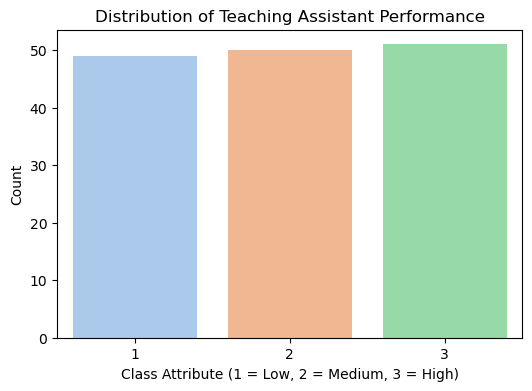

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Class_attribute"], palette="pastel")
plt.title("Distribution of Teaching Assistant Performance")
plt.xlabel("Class Attribute (1 = Low, 2 = Medium, 3 = High)")
plt.ylabel("Count")
plt.show()


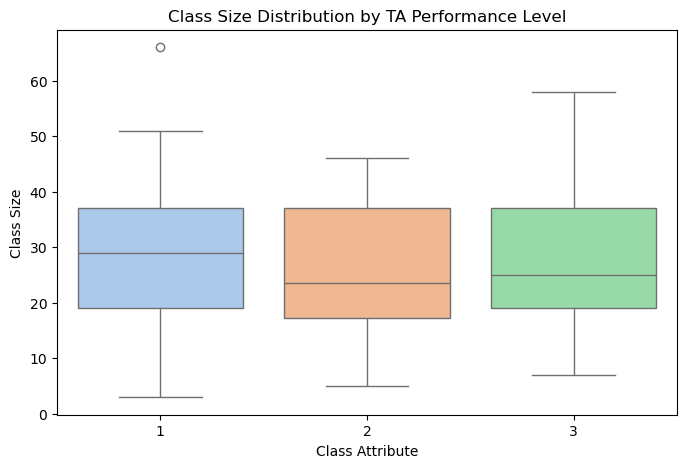

In [ ]:
# Boxplot for Class Size
plt.figure(figsize=(8, 5))
sns.boxplot(x="Class_attribute", y="Class_size", data=df, palette="pastel")
plt.title("Class Size Distribution by TA Performance Level")
plt.xlabel("Class Attribute")
plt.ylabel("Class Size")
plt.show()

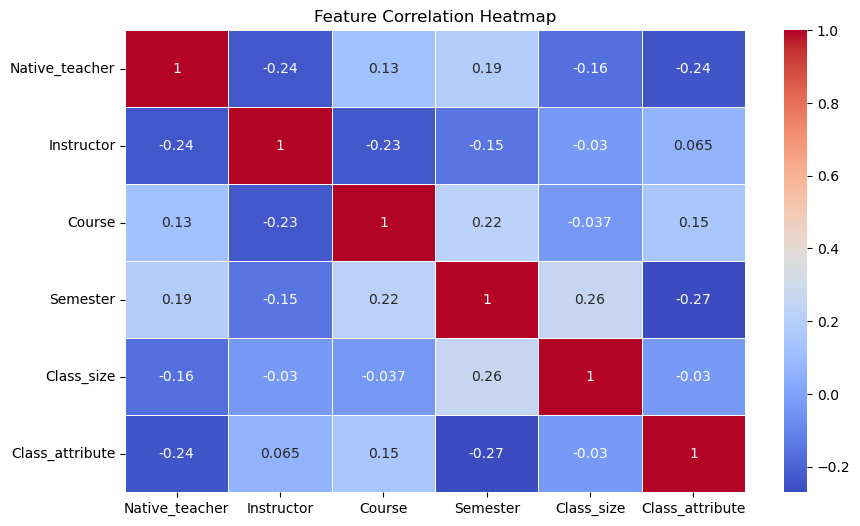

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


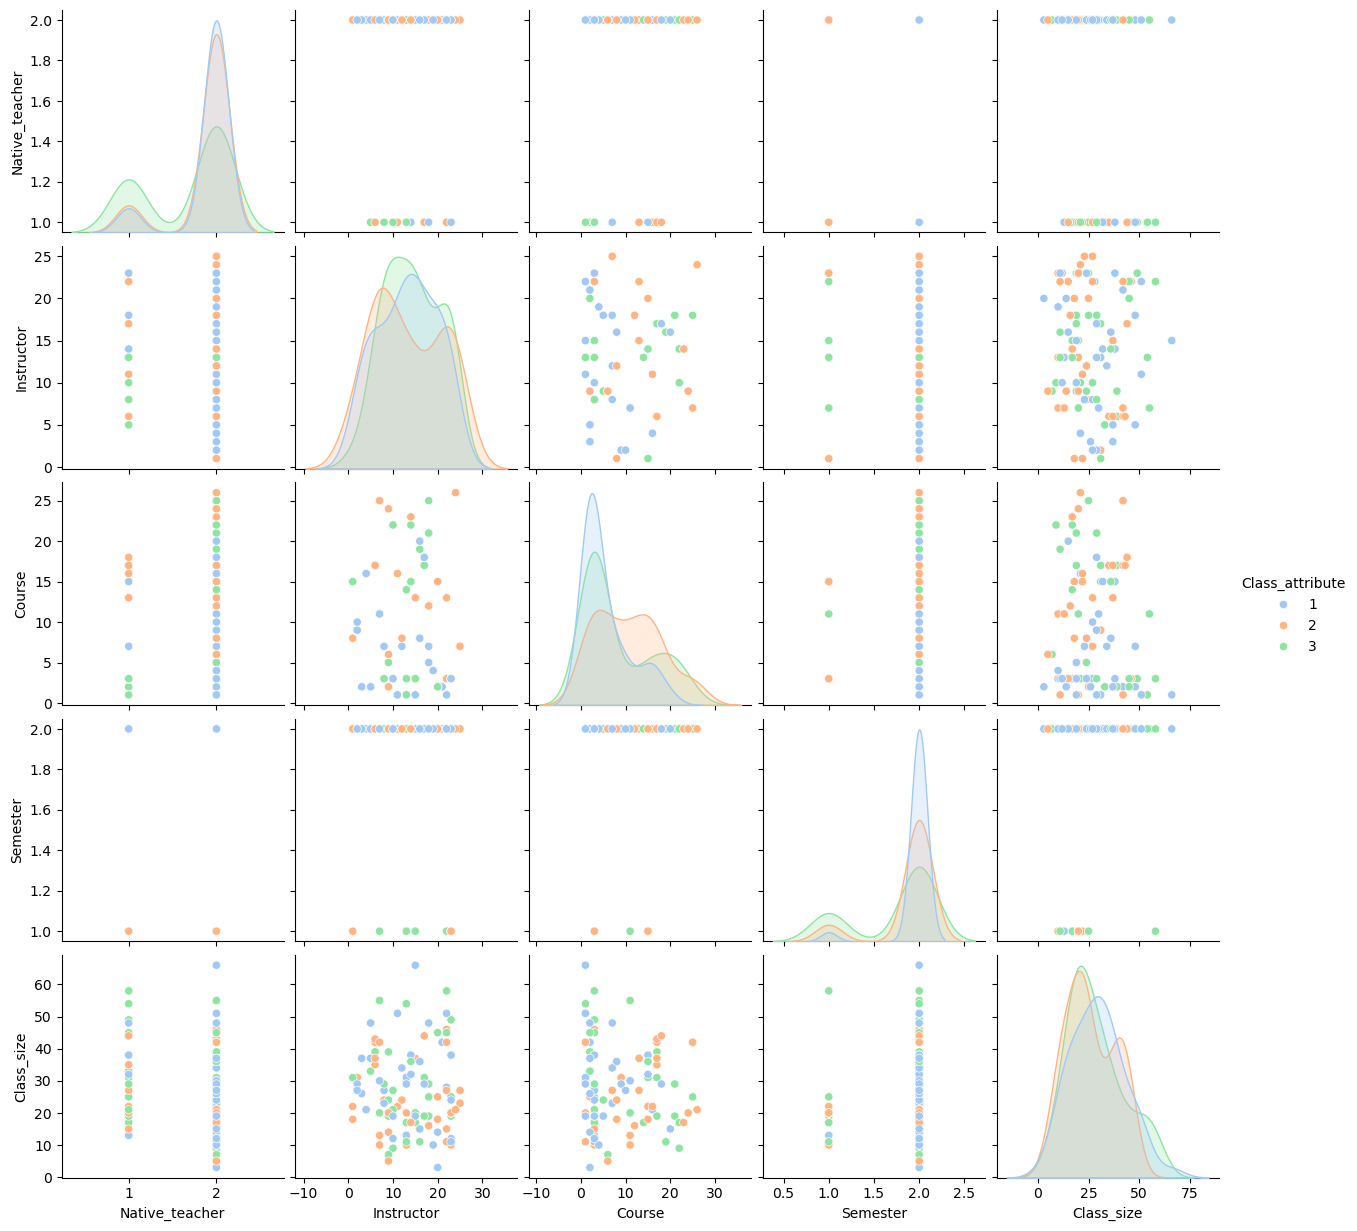

In [ ]:
# Pairplot for Feature Relationships
sns.pairplot(df, hue="Class_attribute", palette="pastel")
plt.show()





In [ ]:
# Feature Engineering: Creating Interaction Features
df['Instructor_Course_Interaction'] = df['Instructor'] * df['Course']


In [ ]:
# Encoding Categorical Variables
encoder = LabelEncoder()
df['Native_teacher'] = encoder.fit_transform(df['Native_teacher'])
df['Instructor'] = encoder.fit_transform(df['Instructor'])
df['Course'] = encoder.fit_transform(df['Course'])
df['Semester'] = encoder.fit_transform(df['Semester'])


In [ ]:
# Feature Scaling
scaler = StandardScaler()
df['Class_size'] = scaler.fit_transform(df[['Class_size']])


In [ ]:
# Splitting Data
X = df.drop(columns=["Class_attribute"])
y = df["Class_attribute"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Handling Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
# Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

In [ ]:
# Model Training
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC()
}


In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Model Performance:
Accuracy: 0.5161290322580645
Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.40      0.47        10
           2       0.44      0.80      0.57        10
           3       0.67      0.36      0.47        11

    accuracy                           0.52        31
   macro avg       0.56      0.52      0.50        31
weighted avg       0.56      0.52      0.50        31

Confusion Matrix:
 [[4 6 0]
 [0 8 2]
 [3 4 4]]

Decision Tree Model Performance:
Accuracy: 0.4838709677419355
Classification Report:
               precision    recall  f1-score   support

           1       0.40      0.40      0.40        10
           2       0.43      0.60      0.50        10
           3       0.71      0.45      0.56        11

    accuracy                           0.48        31
   macro avg       0.51      0.48      0.49        31
weighted avg       0.52      0.48      0.49        31

Confusion M

In [ ]:
# Stacking Model
stack_model = StackingClassifier(estimators=[
    ('rf', best_rf),
    ('gb', GradientBoostingClassifier(n_estimators=100)),
    ('xgb', XGBClassifier(n_estimators=100))
], final_estimator=LogisticRegression())

stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)
print("Stacking Model Accuracy:", accuracy_score(y_test, y_pred_stack))

Stacking Model Accuracy: 0.5161290322580645


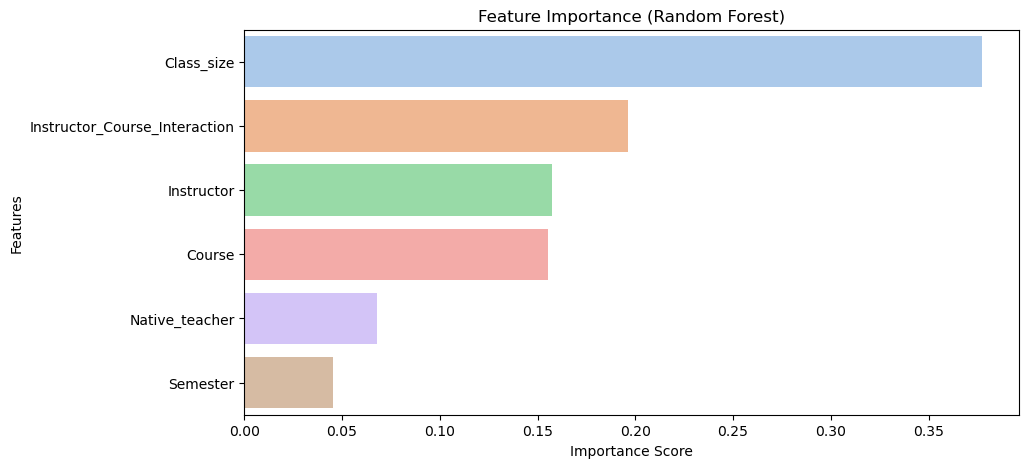

In [ ]:
# Feature Importance
feature_importance = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="pastel")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


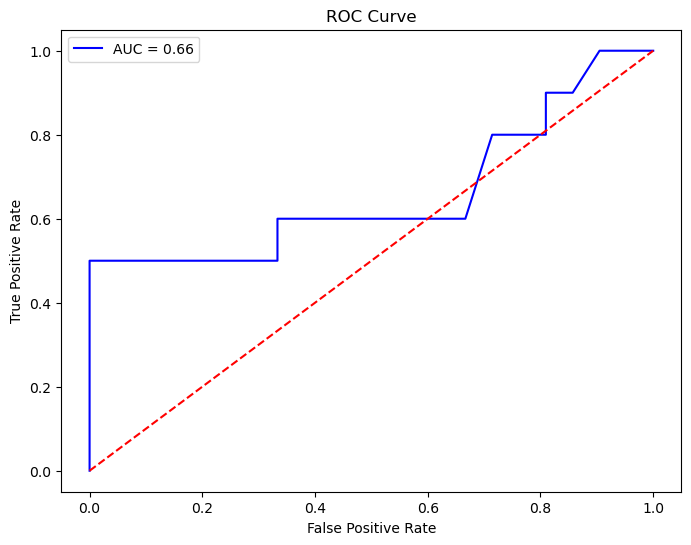

In [ ]:
# ROC Curve
y_proba = best_rf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1], pos_label=best_rf.classes_[1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
# Feature Importance (For Tree-Based Models)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

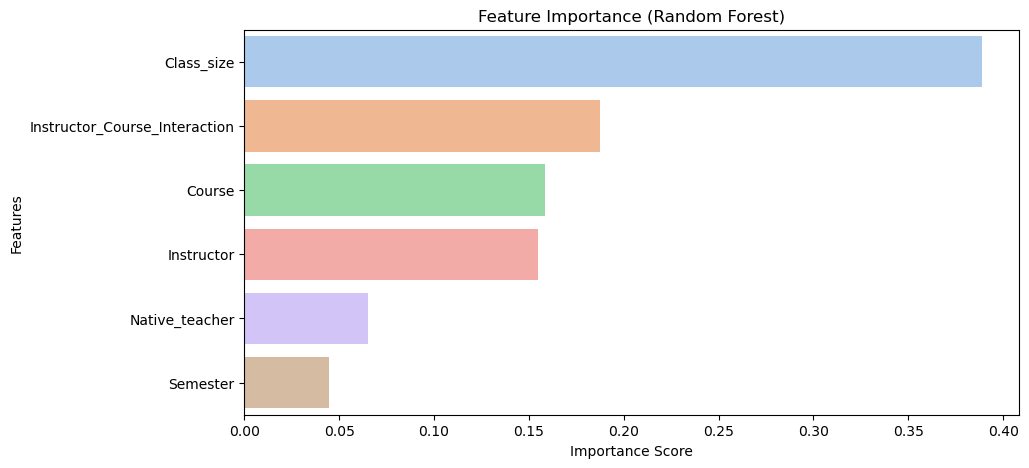

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="pastel")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


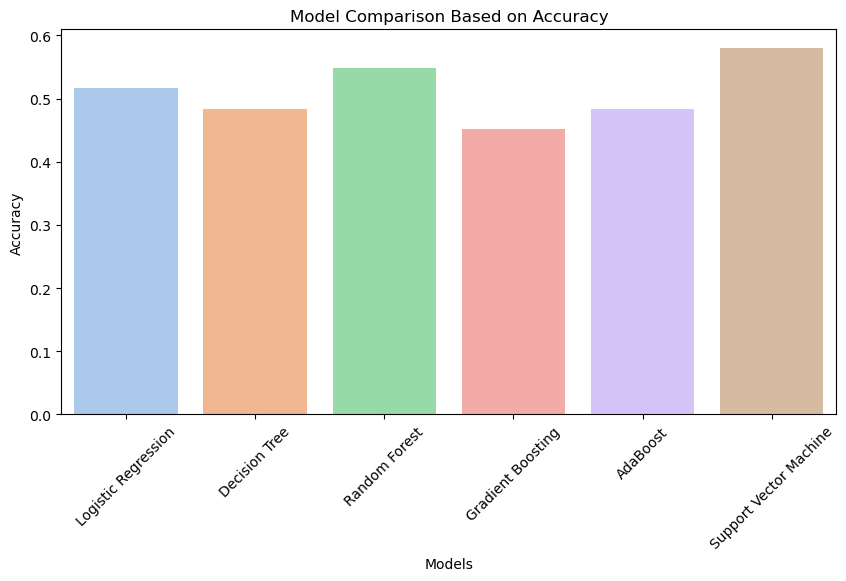

In [ ]:
# Model Comparison Visualization
model_names = list(models.keys())
accuracies = [accuracy_score(y_test, models[model].predict(X_test)) for model in model_names]
plt.figure(figsize=(10, 5))
sns.barplot(x=model_names, y=accuracies, palette="pastel")
plt.xticks(rotation=45)
plt.title("Model Comparison Based on Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()
